<a href="https://colab.research.google.com/github/Ridoo98/Im_StorageonRidoo/blob/main/1_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

The aim of this homework is to get familiar with norms and inner products, building blocks that we use to create a simple k-NN classifier.


In [90]:
import numpy as np

## Exercise 1 - Implementing Norms

We introduced norms as a way to measure the 'size' of a vector. Before we continue, recall the definition of the $p$-norms and the $\infty$-norm. For a vector $x = (x_1,\dots,x_n) \in \mathbb{R}^n$ and number $p\geq 1$, the $p$-norm is given by 


$$
\|x\|_p = \left(\sum_{i=1}^n |x_i|^p\right)^{1/p} ,
$$

and the $\infty$-norm is given by

$$
\|x\|_\infty = \max_{i=1,\dots, n}|x_i| .
$$


Consider the following two vectors $\mathbf{a}$ and $\mathbf{b}$.

In [91]:
a = np.array([ 1.1, -0.4,  1.4,  0.7, -0.8, 1.1,  0.5, 0.0,  0.5,  1.6])
b = np.array([14.0,  4.1,  5.1 , -5.7, 15.6, 2.1, 11.0, -8.7, -6.7, -2.2])

NumPy provides a build-in routine to compute different norms of vectors. This routine is called `norm` and part of the `linalg` toolkit. In the following we use this routine to compute the $\ell_2$, $\ell_1$ and $\ell_\infty$ norm, that are special cases of the more general $p$-norm. 

* For more details have a look at the [NumPy documentation for norms](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

Let's start with the $\ell_2$ of the vector $\mathbf{a}$. (The 2-norm is the default norm, so you can also set `ord=None` which is the default.)

In [92]:
check1 = np.linalg.norm(a, ord=2)
check1

2.9546573405388314

Next, we compute the $\ell_1$ norm.

In [93]:
check2 = np.linalg.norm(a, ord=1)
check2

8.1

Finally, we compute the $\ell_\infty$ norm.

In [94]:
check3 = np.linalg.norm(a, ord=np.inf)
check3

1.6

You can also compute the distance between two vectors.

In [95]:
check4 = np.linalg.norm(a-b, ord=2)
check4

27.631322805830344

## Part A (2 points)

Now it is your turn. Implement these three norms using either a for-loop or better vectorized operations such as `np.sum` and check that your results are correct.

Here goes your implementation of the the $\ell_2$.

In [96]:
def two_norm(x):
  return np.sqrt(np.sum(x**2))

In [97]:
n2 = two_norm(a)
s1 = n2==check1

print('ℓ2 of a is %f.\
   \n The correctness are %s.'%(n2,s1))

ℓ2 of a is 2.954657.   
 The correctness are True.


## Part B (2 points)

Here goes your implementation of the the $\ell_1$.

In [98]:
def one_norm(x):
  return np.sum(np.sqrt(x**2))

In [99]:
print(one_norm(a))

8.1


## Part C (2 points)


Here goes your implementation of the the $\ell_\infty$.

In [100]:
def inf_norm(x):
  return np.max(np.sqrt(x**2))

In [101]:
print(inf_norm(a))

1.6


## Part D (2 points)

Use your function `two_norm` to compute the unit vector $\mathbf{\hat{b}}$, i.e., $\|\mathbf{\hat{b}}\|_2=1$.

In [102]:
b_hat = b/two_norm(b)

In [103]:
print(b_hat)

[ 0.50600573  0.14818739  0.18433066 -0.20601662  0.56383496  0.07590086
  0.39757593 -0.31444642 -0.24215989 -0.07951519]


Check that $\mathbf{\hat{b}}$ has actually length 1.

In [104]:
print(np.linalg.norm(b_hat))

1.0


# Optional: Lp Balls

In the previous section, we introduced norms as a way to measure the 'size' of a vector. Here, we will see that norms give us a natural way to define an important type of set, namely balls associated with those norms. 
These balls generalize circles and spheres (which are the balls associated with the Euclidean norm in $\mathbb{R}^{2}$ and $\mathbb{R}^{3}$, respectively.
They can be used to understand the hard-to-visualize $\mathbb{R}^{n}$.


For any given $p$-norm, for $p \in [1,\infty]$, there is a special set called the _unit $p$-ball_, which is defined as

$$
B_p = \{x\in\mathbb{R}^n \mid \|x\|_p \leq 1\}
$$

This set contains all vectors $x\in \mathbb{R}^n$ whose $p$-norm is at most $1$. 
The term 'ball' is used to describe this object because of intuition coming from the Euclidean norm / $2$-norm. 
This will become more clear in the next section.


### The Euclidean ball

A special case of the unit $p$-balls is the Euclidean unit ball, which is given by the set

$$
B_2 = \{x\in\mathbb{R}^n\mid \|x\|_2 \leq 1\} .
$$

To get some intuition, let's focus on the 2-dimensional case -- i.e., when $n=2$. 
Then, the unit ball is the set of all points $x = (x_1,x_2)$ such that $\sqrt{x_1^2 + x_2^2} \leq 1$, or equivalently, the set of all points such that $x_1^2 + x_2^2 \leq 1$. 
From basic geometry, we know that the equation $x_1^2 + x_2^2 = 1$ defines a circle of radius 1 in the plane.
Hence, the set of points satisfying $x_1^2 + x_2^2 \leq 1$ includes all points on or inside of this circle. 

To visualize the unit balls in this section, below we define the function `plotUnitBall()`, which plots the $p$-balls using the following method: first, we draw a point $x$ at random from the set $[-1,1]\times[-1,1]$, and then plot the point if $\|x\|_p\leq 1$, and don't plot it otherwise. 
We repeat this for $5000$ points. However, you can also try varying the number of points yourself by changing the value of `n_samples`.

In [105]:
import matplotlib.pyplot as plt
import numpy as np 
from numpy.linalg import norm
def plotUnitBall(p, n_samples=5000):
    x_valid = []
    for i in range(n_samples):
        x = np.array([np.random.rand()*2-1,np.random.rand()*2-1]) #random point in [-1,1] x [-1,1]
        if norm(x,ord=p) <= 1:
            x_valid.append(x)
    x_valid = np.asarray(x_valid).T
    plt.scatter(x_valid[0,:],x_valid[1,:], color='blue')    
    plt.axis('square')
    title = 'Unit %s ball' % str(p)
    plt.title(title, fontsize=16)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.show()

Visually, we can use this to verify that the set $B_2$ is indeed a circle:

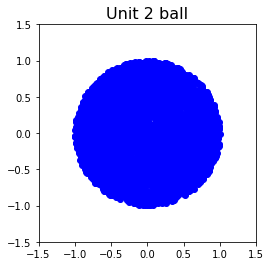

In [106]:
plotUnitBall(2)

As expected, we see that this gives us a circle of radius of radius $1$. 


### Visualizing the $1$-ball and $\infty$-ball

While the unit ball for the $2$-norm was in fact a 'round' ball shape, this is not the case for other norms. 
Before plotting them, however, let's try to figure out what the shape of the $\infty$ and $1$ norm balls should be. 

Let's start with the $\infty$-norm ball. Take a point $x\in [-1,1]\times [-1,1]$. What is the largest that its $\infty$-norm could be? We have $\|x\|_\infty = \max(|x_1|, |x_2|)$, but since $x_1 \in [-1,1]$ and $x_2\in [-1,1]$, we have that $|x_1|$ and $|x_2|$ are both at most $1$, hence $\|x\|_\infty \leq 1$. 
On the other hand, if $x$ is outside of the set $[-1,1]\times [-1,1]$, then at least one of its components is larger than $1$ in absolute value, and so its $\infty$-norm must be greater than one. 
Therefore we guess that the unit $\infty$-ball must just be the entire box $[-1,1]\times[-1,1]$. 

Let's test this out using the `plotUnitBall()` function.

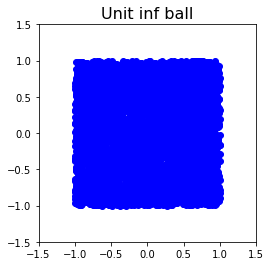

In [107]:
plotUnitBall(np.inf)

As expected, we get a box (with sides parallel to the canonical axes)!

Now let's move on to the $1$-norm. Let's consider the points along the boundary of the $1$-norm ball, which are the points satisfying  $|x_1|+|x_2| = 1$. When $x_1, x_2\geq 0$, this just gives us the equation of a line with slope $-1$ and intercept $1$: $x_2 = 1-x_1$. When $x_2\geq 0$ and $x_1<0$, then this equation gives us a line with slope $1$ and intercept $1$: $x_2 = 1+x_1$. When $x_2<0$ and $x_1<0$, then we get a line with slope $-1$ and intercept $-1$: $x_2 = -1 - x_1$, and finally what $x_2<0$ and $x_1\geq 0$, we get a line with slope $1$ and intercept $-1$: $x_2 = -1+x_1$. If we put these four lines together, we should get the shape of a diamond. 

Let's verify this with our `plotUnitBall()` function:

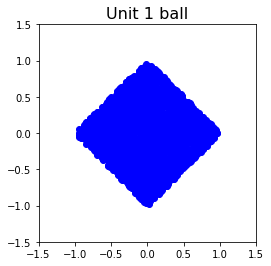

In [108]:
plotUnitBall(1)

### Comparing unit balls of different norms

In the last section in the workbook, we saw that the $p$-norms are ordered, meaning that if $1\leq p<q\leq \infty$, then for any vector $x$

$$
\|x\|_q \leq \|x\|_p  .
$$

What does this mean in terms of the sizes of the different unit balls? 
Intuitively, if the norm $\|\cdot\|_q$ gives _smaller_ values than $\|\cdot\|_p$, then _more_ vectors will have norm $\leq 1$ with respect to the $q$-ball than the $p$-ball. 
Hence, because of the above inequality, we expect the unit balls to get bigger as $p$ grows. 
Indeed, the $\infty$-norm ball is the largest of all the unit balls, and the $1$-ball is the smallest. 
A natural way to measure the size of the unit balls (at least in $\mathbb{R}^2$) is to measure their area (or volume, for $\mathbb{R}^{n}$, for $n \ge 3$). 
For example, the $\infty$-ball is just the entire set $[-1,1]\times[-1,1]$, which is a box with area $4$, and the $2$-ball is a circle with radius $1$, which has area $\pi$. 

We include a function below which lets us estimate the area of any $p$-ball.

In [109]:
def unitBallVolume(p, n_samples=10000):
    vol = 0
    for i in range(n_samples):
        x = np.array([np.random.rand()*2-1,np.random.rand()*2-1]) #random point in [-1,1] x [-1,1]
        if norm(x,ord=p) <= 1:
            vol += 1
    vol /= n_samples
    vol *= 4
    return vol

The function `unitBallVolume(p)` works in the following way: similar to how we plotted the unit balls, we sample `n_samples` (defaulting to 10,000) points at random from the set $[-1,1]\times[-1,1]$ and measure the fraction of points that satisfy $\|x\|_p\leq 1$. 
We then mulitply the result by $4$ (the area of the box $[-1,1]\times[-1,1]$), and this gives us a pretty good estimate of the area of unit $p$-ball! 
Let's check this with the $2$-ball, and see if it gives us a good approximation to $\pi$:

In [110]:
unitBallVolume(2)

3.1264

This will give us a different result every time due to random sampling, but it should be a pretty good estimate. We can make the approximation better by increasing the value of `n_samples`. 

We can do a similar check with the $1$-ball. 
This area can be computed by recognizing that the diamond shape is made up of 4 right triangles, each with area $1/2$, and so the area of the unit $1$-ball should be $2$. 
Let's check that our function gives us a reasonably accurate estimate:

In [111]:
unitBallVolume(1)

2.0044

Note that this function just computes things in $\mathbb{R}^2$, but in principal we could apply the same method to estimate the _volumes_ of the $p$-balls in any dimension -- though the computation would in general be much slower. 

Now we can use this function to see how the area of the unit balls in 2 dimensions grows with $p$:

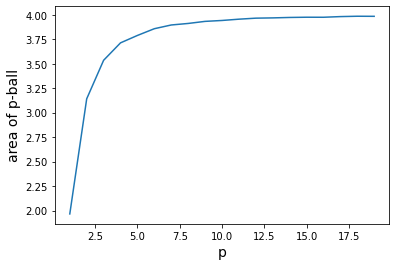

In [112]:
import matplotlib.pyplot as plt
import numpy as np

p_range = np.arange(1, 20, 1)
areas = [unitBallVolume(p) for p in p_range]

plt.plot(p_range, areas)
plt.xlabel('p', fontsize=14)
plt.ylabel('area of p-ball', fontsize=14)
plt.show()

As expected, this is a nice increasing curve which starts at $2$ (the area of the 1-ball) and increases to very close to $4$ (the area of the $\infty$-ball).

## Exercise 2 - Implementing Dot Products

### Review of dot products in $\mathbb{R}^n$

One of the most important quantities we compute in linear algebra are _inner products_, also called the _dot product_. 
For two vectors $x,y \in \mathbb{R}^n$, the inner product is the number


$$
x^\top y = \sum_{i=1}^n x_iy_i .
$$


Importantly, an inner product can be thought of as a linear function from $\mathbb{R}^n$ to $\mathbb{R}$: if we fix $y\in \mathbb{R}^n$, then the function $T_y(x) = x^\top y$ is clearly linear, since for any $x,x' \in \mathbb{R}^n$ and $\alpha \in \mathbb{R}$, we have


$$
T_y(x + \alpha x') = (x+\alpha x')^\top y = \sum_{i=1}^n (x_i + \alpha x'_i)y_i = \sum_{i=1}^n x_iy_i + \alpha\sum_{i=1}^nx'_iy_i = x^\top y + \alpha (x')^\top y = T_y(x) + \alpha T_y(x') .
$$


Dot products are also the basis of matrix multiplication: if $A \in \mathbb{R}^{n\times m}$ and $B\in \mathbb{R}^{m\times p}$ are matrices, and $a_1,\dots, a_n$ are the rows of $A$ and $b_1,\dots, b_p$ are the columns of $B$, then the $(i,j)$th element of $AB$ is just $a_i^\top b_j$. 

In this chapter, however, we will be interested in a more geometric interpretation of dot products, namely that they are used to compute the angle between two vectors.

### Computing angles between vectors with dot products

One of the most important facts about dot products is that they give us a way to compute the _angle_ $\theta$ between any two vectors $x,y\in \mathbb{R}^n$. 
This is due to the following important identity:


$$
x^\top y = \|x\|_2\|y\|_2\cos(\theta)
$$


Therefore we have that the angle $\theta$ can be found with 


$$
\theta = \arccos \left(\frac{x^\top y}{\|x\|_2 \|y\|_2}\right)
$$



To compute a dot product between two vectors in python, you can use the the routine `np.dot`, or you can also use the method `.dot`. 

Let's compute the dot product of $\mathbf{a}$ and $\mathbf{b}$.

In [113]:
a.dot(b)

5.37

In [114]:
np.dot(a,b)

5.37

There is also a third way to compute the dot product between two vectors.

In [115]:
a @ b

5.37

## Part A (4 points)


To build some more intuition, implement first a for loop to compute the dot product.

In [116]:
def dot_product_loop(x,y):
  b = 0
  m1 = x.T.flatten()
  m2 = y.flatten()
  for i in range(len(m1)):
    b += m1[i]*m2[i]
  return b

Now, use the `np.sum` routine to implement the dot product without using a loop (2p).

In [117]:
def dot_product(x,y):
    return np.sum(x*y)

Let's check that your two functions are correct.

In [118]:
dot_product_loop(a,b)

5.37

In [119]:
dot_product(a,b)

5.37

You should yield the same results as given by the build in NumPy functions.

While for loops are often useful, they are slow. Let's compare the computational speed between the build-in function and the two functions that you just coded. First, we create two random vector of length $10.000.000$.

In [120]:
np.random.seed(1)
p = np.random.standard_normal(10**7)
q = np.random.standard_normal(10**7)

In [121]:
%%time
print(p.dot(q))

-5556.201636606669
CPU times: user 33.4 ms, sys: 4.02 ms, total: 37.4 ms
Wall time: 34.4 ms


In [122]:
%%time
print(dot_product_loop(p,q))

-5556.2016366068565
CPU times: user 4.19 s, sys: 109 ms, total: 4.3 s
Wall time: 4.24 s


In [123]:
%%time
print(dot_product(p,q))

-5556.201636606647
CPU times: user 45.9 ms, sys: 1.93 ms, total: 47.9 ms
Wall time: 49.1 ms


You should see that the in-build dot product takes only a few milliseconds, while the loop takes a few seconds. On my machine the in-build machine is faster by a factor of about 400!

# Exercise - Cosine Similarity

Text mining and classification problems play a vital role in many real world applications. For example, assume you are asked to categorize a few hundred news paper articles based on the headlines. Of course, you can do this job by hand, but it might be tedious. So let's think about how we can automate this task. 

Assume you are given the following headlines. 

* Tomorrow will be a rainy day! 
* It will be a rainy day tomorrow!
* Deep learning algorithm finds hidden warning!
* Machine learning is able to learn without human supervision!

You can guess that the first and second headline belong to same category, i.e., weather. In order to come up with a quantitative answer, we need to first transform each of these text sequences into a set of ordered numeric values. There are many ways to do so, and a simple method is to count the appearance of each word in the text sequence. First, we need to store the text sequences as strings in a list. 

In [124]:
headlines = [
'linear algebra can do fun things', 
'I can do fun things with linear algebra',
'machine learning is the future',
'deep learning is even more fun'
]

Now, we can use a function provided by scikit-learn to transform the raw text into a matrix.

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(headlines)
X = sentence_vectors.toarray()
print(X)

[[1 1 0 1 0 1 0 0 0 1 0 0 0 1 0]
 [1 1 0 1 0 1 0 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 0 1 1 1 0 1 0 1 0 0]
 [0 0 1 0 1 1 0 1 1 0 0 1 0 0 0]]


Looking at the rows, you can tell that the first and second row look very similar. To get a numeric answer, we can compute the cosine similarity between the first and second row of the matrix, i.e., between two vectors. 

Recall, cosine similarity is a metric that measures how similar or dissimilar two vectors are is defined as

$$ 	\text{similarity}(\boldsymbol{x},\boldsymbol{y}) := \cos \theta= \frac{\boldsymbol{x}^T \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2} $$

We can use a build in function in Sklearn to do so.

In [126]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(X[0].reshape(1, -1), X[1].reshape(1, -1))[0])

[0.9258201]


## Part A (2 points)


Now, write your own function that computes cosine similarity using only numpy's dot product. 

Recall that you can compute the 2-norm of a vector as $\|\mathbf{x}\|_2 = \sqrt{\mathbf{x}^T \mathbf{x}}$. 

In [127]:
def cos_similarity(x, y):
    return np.dot(x.T,y)/(two_norm(x)*two_norm(y))

In [128]:
print(cos_similarity(X[0], X[1]))

0.9258200997725514


Now, try to compute the cosine similarity between the first and third row. Did you expect this result?

In [129]:
print(cos_similarity(X[0], X[2]))

0.0


### A gotcha

One point which is important to keep in mind when computing angles numerically is that we need to be careful when applying the $\arccos$ function in practice. To meaningfully interpret the angle $\arccos \left(\frac{x^\top y}{\|x\|_2 \|y\|_2}\right)$, we need to have that $-1\leq \frac{x^\top y}{\|x\|_2 \|y\|_2} \leq 1$. This is always true mathematically; however, numerically we could run into situations where $x$ and $y$ are parallel, but when we compute $\frac{x^\top y}{\|x\|_2 \|y\|_2}$ we obtain a number like $1.0000000000000002$. In this case, when we take the arccosine, we won't get a meaningful answer (since it is only defined for values in $[-1,1]$. Let's see a simple example.

In [130]:
np.random.seed(1) #set seed for reproducibility

a = np.random.randn(200)
b = 0.22342323423442342342342342343422342342343242342343234**2*a
print(cos_similarity(a, b))
print(np.arccos(cos_similarity(a, b)))

0.9999999999999998
2.1073424255447017e-08


# k-Nearest Neighbors for Classifier

In the following we aim to build our own k-Nearest Neighbors (kNN) Classifier and compare the performance to sklearn's kNN classifier routine. 

To experiment with our classifier we use the MNIST dataset. This dataset consists handwritten digits.


### The Dataset

We load and visualize the first 25 hand-written digits in the dataset:

In [131]:
from sklearn.datasets import load_digits
digits, targets = load_digits(return_X_y=True)

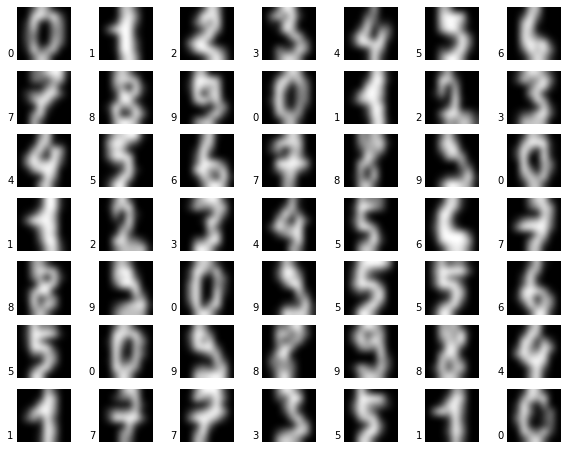

In [132]:
import matplotlib.pyplot as plt

# set up the figure
fig, ax = plt.subplots(7,7,figsize=(10,8))
ax = ax.flatten()

index = 0
for axis in ax:
    axis.imshow(digits[index,:].reshape(8,8), cmap=plt.cm.gray, interpolation='bicubic')
    axis.text(-2, 7, str(int(targets[index])))
    axis.axis('off')
    index +=1
plt.show()

The data consists of 8×8 pixel images, meaning that they are 64-dimensional. Note, that this dataset is only a small subset of the MNIST database: http://yann.lecun.com/exdb/mnist/index.html.

We can also plot some examples in vectorized form.

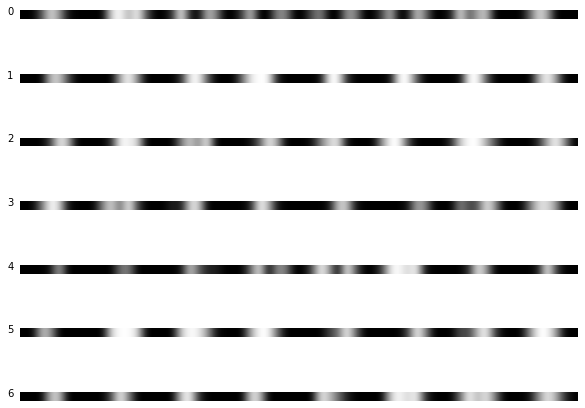

In [133]:
# set up the figure
fig, ax = plt.subplots(7,1,figsize=(10,8))
ax = ax.flatten()

index = 0
for axis in ax:
    axis.imshow(digits[index,:].reshape(1,64), cmap=plt.cm.gray, interpolation='bicubic')
    axis.text(-2, 0, str(int(targets[index])))
    axis.axis('off')
    index +=1
plt.show()

## Split the Dataset

Next, we split the dataset into a training and test dataset.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits, targets, test_size=0.5, random_state=42)

# Establish a Baseline using sklearn

Before we build our own classifier, we establish a baseline using sklearn's k-NN classifier.

In [135]:
from sklearn.neighbors import KNeighborsClassifier

First, we construct an object. For now, we set number of nearest neighbors to 1. 

In [136]:
neigh = KNeighborsClassifier(n_neighbors=1)

Next, we fit the classifier to our data.

In [137]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Now, we can check how accurate the classifier is. Therefore we first predict the labels for the data points in our test set and then we compute the accuracy, given that we know the true labels.

In [138]:
pred = neigh.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9833147942157954

Wow! We got about 98.3% of all data points in our test set correct. 

## Part A (5 points) - Build a Nearest Neighbor classifier from scratch

Let's start with building a nearest neighbor classifier (i.e., k=1).

In [140]:
np.linalg.norm(np.array([3,4]))

5.0

In [141]:
class knn():
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, z):
        prediction = []
        for i in range(z.shape[0]):
            smallest_distance = np.inf
            predicted_class = None
            for j in range(self.X.shape[0]):
                distance = np.linalg.norm(self.X[j]-z[i])
                if distance < smallest_distance:
                    smallest_distance = distance
                    predicted_class = self.y[j]
            prediction.append(predicted_class)
        return np.asarray(prediction) 

In [142]:
my_knn = knn()

In [143]:
my_knn.fit(X_train, y_train)

In [144]:
pred = my_knn.predict(X_test)

You should get the same answer as the sklearn knn classifier, i.e., 0.98.

In [145]:
accuracy_score(y_test, pred)

0.9833147942157954

## Part B (5 points) - Build a k Nearest Neighbor classifier from scratch

Let's extend the algorithm and build a k-NN classifier. One way to do is the following approach:

* First compute all distances and store them in a list. 
* Once we have computed the distances, we can convert the list into an `np.array` using `np.asarray`. 
* Then, we can use `np.argsort` do find the index set that correspond to the data points in ascending.
* We can then use the index set to sort the targets `y`.
* Finally we select the k targets corresponding to the data points that are nearest to the query point. We can use the `mode` to compute the majority vote. Here is an example. Given a vector y, we compute the value that most often occurs as

In [146]:
y = np.array([1,1,2,2,2,3,4,4,5,6,8,8,9])
np.bincount(y).argmax()

2

Here goes your code. 

In [147]:
class knn():
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, z):
        prediction = []
        for i in range(z.shape[0]):
            distances = []
            for j in range(self.X.shape[0]):
                distance = np.linalg.norm(self.X[j]-z[i])
                distances.append(distance)
            distances = np.asarray(distances)
            idx = np.argsort(distances)
            y_hat = np.bincount(self.y[idx[0:self.n_neighbors]]).argmax()
            prediction.append(y_hat)
        return np.asarray(prediction) 

First try to compute the accuracy for k=1. You should get the same answer as before.

In [148]:
my_knn = knn(n_neighbors=1)

In [149]:
my_knn.fit(X_train, y_train)

In [150]:
pred = my_knn.predict(X_test)

In [151]:
accuracy_score(y_test, pred)

0.9833147942157954

Now, evaluate the your classifier for k in 1,2,3,...,15 and plot the test accuracy as a function of k.

In [152]:
import timeit

In [153]:
t0 = timeit.default_timer()
errors = []
for k in range(1,16):
    my_knn = knn(n_neighbors=k)
    my_knn.fit(X_train, y_train)
    pred = my_knn.predict(X_test)
    errors.append(accuracy_score(y_test, pred))

print('Total time', timeit.default_timer()-t0)

Total time 84.13271587400004


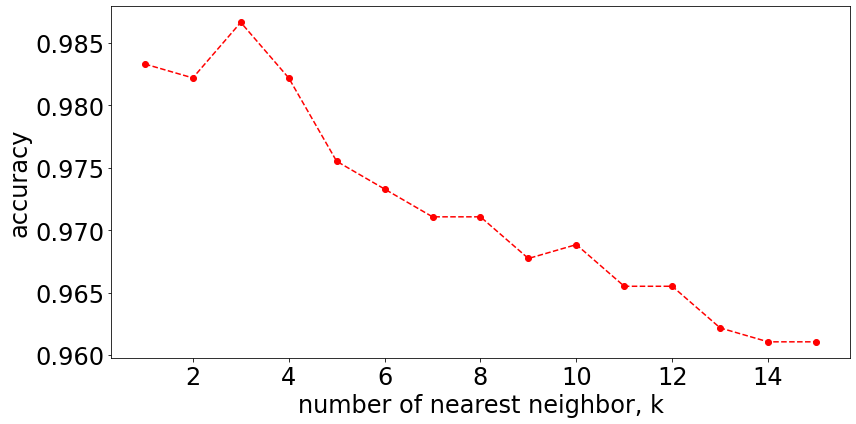

In [154]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), errors, 'o--', c='red')
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.locator_params(axis='y', nbins=8)         
#plt.ylim(30, 98)
plt.ylabel('accuracy',fontsize=24)
plt.xlabel('number of nearest neighbor, k', fontsize=24)
plt.tight_layout()
plt.show()

## Part C (3 points) - Vectorize the inner for loop

The implementation that we have used is relatively slow. We don't need the inner for loop. Vectorize the code. You should see a speedup of a factor of about 30-40.

In [155]:
class knn():
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, z):
        prediction = []
        for i in range(z.shape[0]):
            diff = self.X - z[i]
            distances = np.linalg.norm(diff,axis=1)
            idx = np.argsort(distances.flatten())
            y_hat = np.bincount(self.y[idx[0:self.n_neighbors]]).argmax()
            prediction.append(y_hat)
        return np.asarray(prediction) 

In [156]:
t0 = timeit.default_timer()
errors = []
for k in range(1,16):
    my_knn = knn(n_neighbors=k)
    my_knn.fit(X_train, y_train)
    pred = my_knn.predict(X_test)
    errors.append(accuracy_score(y_test, pred)) 
print('Total time', timeit.default_timer()-t0)

Total time 4.040896616999817


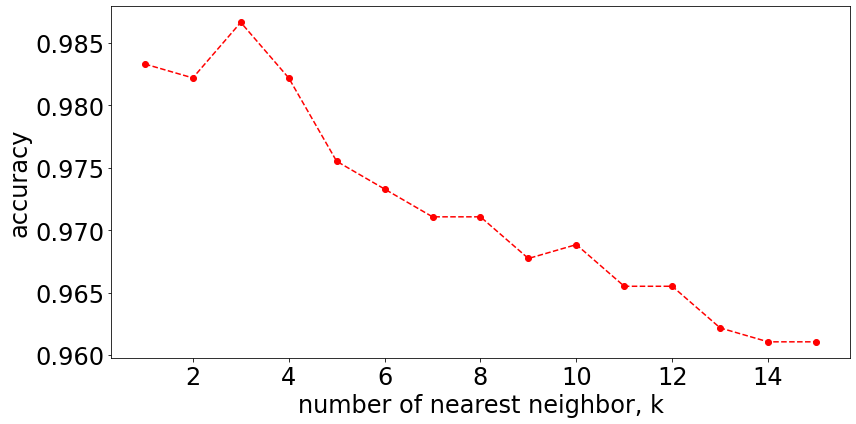

In [157]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), errors, 'o--', c='red')
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.locator_params(axis='y', nbins=8)         
#plt.ylim(30, 98)
plt.ylabel('accuracy',fontsize=24)
plt.xlabel('number of nearest neighbor, k', fontsize=24)
plt.tight_layout()
plt.show()

# k-Nearest Neighbors for Regression

In the following we aim to build our own k-Nearest Neighbors (kNN) algorithm for regression problems. 

To experiment with our method we use the following artificial dataset.

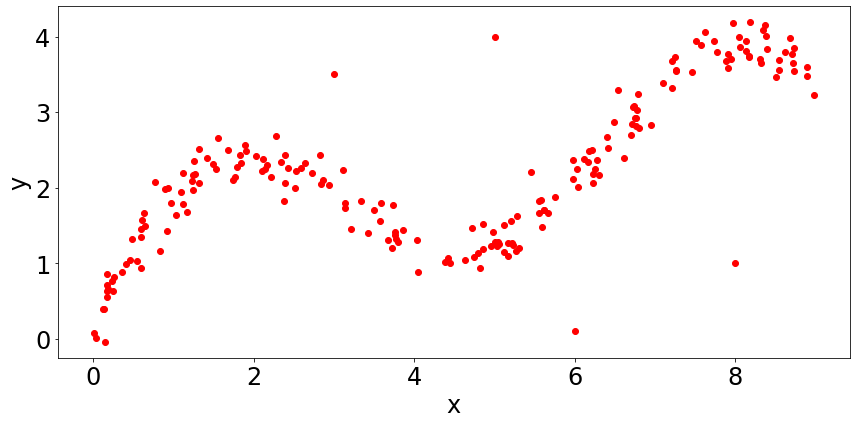

In [158]:
np.random.seed(1)
x = np.random.uniform(0,1, 200) * 9 
y = np.sin(x)  + x**0.5 + np.random.standard_normal(x.shape) *0.2
x = np.hstack((x, 5, 3, 8, 6))
y = np.hstack((y, 4, 3.5, 1, 0.1))

plt.figure(figsize=(12,6))
plt.scatter(x,y, c='red')
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.ylabel('y',fontsize=24)
plt.xlabel('x', fontsize=24)
plt.tight_layout()
plt.show()   

## Split the Dataset

Next, we split the dataset into a training and test dataset.

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Part A - Modify your k-NN class for Regression task (5 points)

Provide an argument `weight` that allows the user to chose between the average and median metric for forming a vote / prediction.  

In [160]:
class knnRegressor():
    def __init__(self, n_neighbors=1, weight='average'):
        self.n_neighbors = n_neighbors
        self.weight = weight
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, z):
        prediction = []
        for i in range(z.shape[0]):
            distances = []
            for j in range(self.X.shape[0]):
                distance = abs(self.X[j]-z[i])
                distances.append(distance)
            distances = np.asarray(distances)
            idx = np.argsort(distances)
            if self.weight == 'average':
                y_hat = np.mean(self.y[idx[0:self.n_neighbors]])
                prediction.append(y_hat)
            elif self.weight == 'median':
                y_hat = np.median(self.y[idx[0:self.n_neighbors]])
                prediction.append(y_hat)           
        return np.asarray(prediction) 
    

Now, evaluate your model for different $k$s. Since this is a regression problem, we need a different measure to evaluate the predictive performance. We use the mean squared error (MSE) here that is defined as 

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})^2$$


In [161]:
from sklearn.metrics import mean_squared_error

In [162]:
t0 = timeit.default_timer()
errors = []
for k in range(1,16):
    my_knn = knnRegressor(n_neighbors=k, weight='average')
    my_knn.fit(X_train, y_train)
    pred = my_knn.predict(X_test)
    errors.append(mean_squared_error(y_test, pred)) 
print('Total time', timeit.default_timer()-t0)

Total time 0.10705530700033705


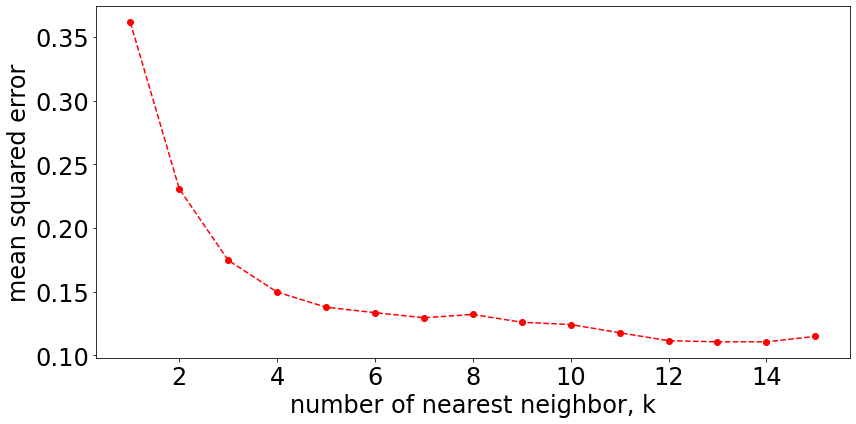

In [163]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), errors, 'o--', c='red')
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.locator_params(axis='y', nbins=8)         
plt.ylabel('mean squared error',fontsize=24)
plt.xlabel('number of nearest neighbor, k', fontsize=24)
plt.tight_layout()
plt.show()

In [164]:
print('MSE %s, for k=%s' %(np.min(errors), np.asarray(errors).argmin()+1 ))

MSE 0.11068175443923234, for k=13


We see that we yield the best performance with about $k=13$.

Now, let's repeat the experiment with the median for forming the vote.

In [165]:
t0 = timeit.default_timer()
errors = []
for k in range(1,16):
    my_knn = knnRegressor(n_neighbors=k, weight='median')
    my_knn.fit(X_train, y_train)
    pred = my_knn.predict(X_test)
    errors.append(mean_squared_error(y_test, pred)) 
print('Total time', timeit.default_timer()-t0)

Total time 0.13285037900004681


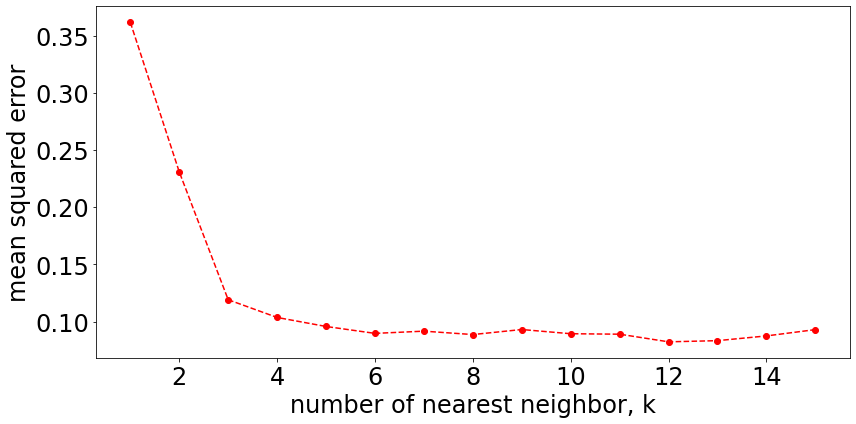

In [166]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), errors, 'o--', c='red')
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.locator_params(axis='y', nbins=8)         
#plt.ylim(30, 98)
plt.ylabel('mean squared error',fontsize=24)
plt.xlabel('number of nearest neighbor, k', fontsize=24)
plt.tight_layout()
plt.show()

In [167]:
print('MSE %s, for k=%s' %(np.min(errors), np.asarray(errors).argmin()+1 ))

MSE 0.08230539453642781, for k=12


# Part B - Scatter Plot Smoother (optional)

Okay, we see that the the MSE is smaller when using the median. That is because our training set has some outliers. To see this, fit a scatter plot smoother to the training data.

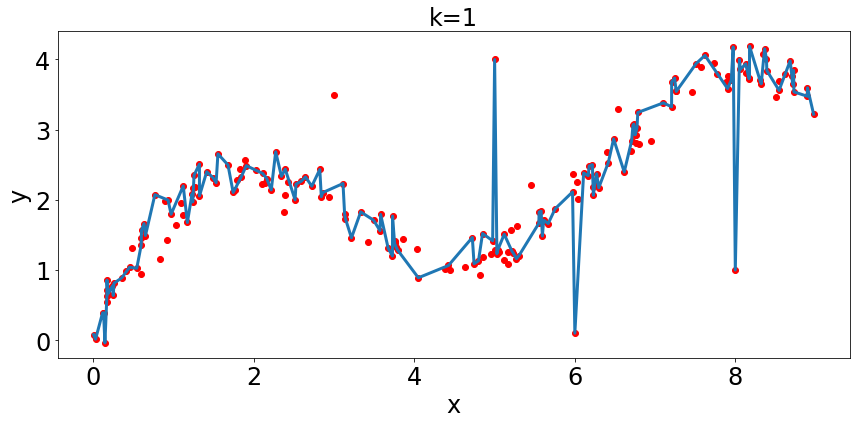

In [168]:
my_knn = knnRegressor(n_neighbors=1, weight='average')
my_knn.fit(X_train, y_train)
pred = my_knn.predict(np.sort(X_train))
plt.figure(figsize=(12,6))
plt.scatter(x,y, c='red')
plt.plot(np.sort(X_train),pred, lw=3)
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.ylabel('y',fontsize=24)
plt.xlabel('x', fontsize=24)
plt.title('k=1',fontsize=24)
plt.tight_layout()
plt.show()   

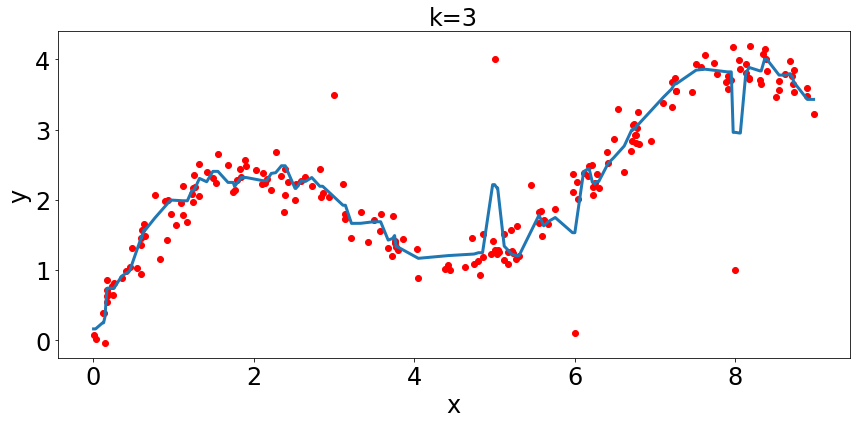

In [169]:
my_knn = knnRegressor(n_neighbors=3, weight='average')
my_knn.fit(X_train, y_train)
pred = my_knn.predict(np.sort(X_train))
plt.figure(figsize=(12,6))
plt.scatter(x,y, c='red')
plt.plot(np.sort(X_train),pred, lw=3)
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.ylabel('y',fontsize=24)
plt.xlabel('x', fontsize=24)
plt.title('k=3',fontsize=24)
plt.tight_layout()
plt.show()  

Clearly we can see that the the outliers have a high influence here. If we chose $k=13$ then we have introduced enough regularization to mitigate the effect.

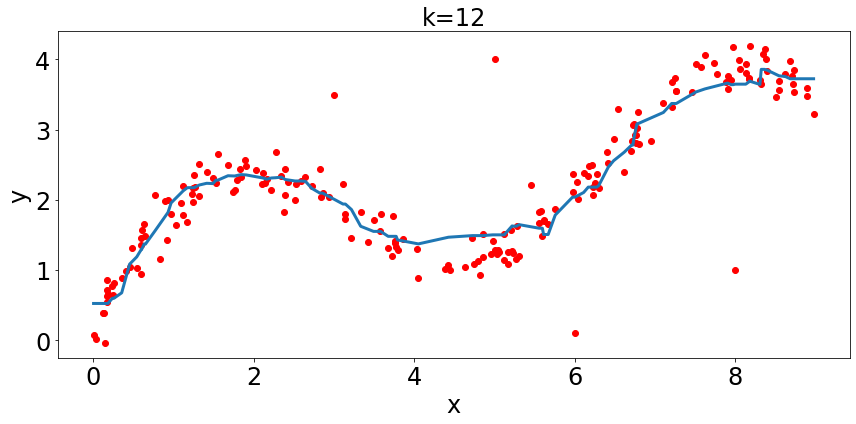

In [170]:
my_knn = knnRegressor(n_neighbors=13, weight='average')
my_knn.fit(X_train, y_train)
pred = my_knn.predict(np.sort(X_train))
plt.figure(figsize=(12,6))
plt.scatter(x,y, c='red')
plt.plot(np.sort(X_train),pred, lw=3)
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.ylabel('y',fontsize=24)
plt.xlabel('x', fontsize=24)
plt.title('k=12',fontsize=24)
plt.tight_layout()
plt.show()  

Now, compare to the model using the median.

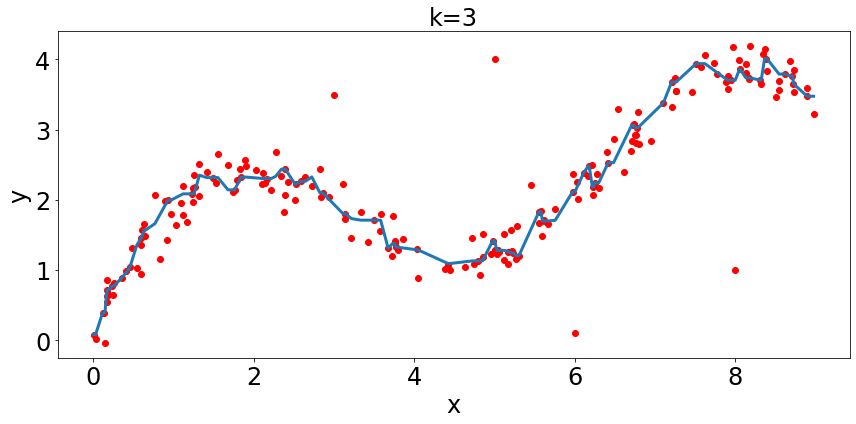

In [171]:
my_knn = knnRegressor(n_neighbors=3, weight='median')
my_knn.fit(X_train, y_train)
pred = my_knn.predict(np.sort(X_train))
plt.figure(figsize=(12,6))
plt.scatter(x,y, c='red')
plt.plot(np.sort(X_train),pred, lw=3)
plt.tick_params(axis='y', labelsize=24) 
plt.tick_params(axis='x', labelsize=24) 
plt.ylabel('y',fontsize=24)
plt.xlabel('x', fontsize=24)
plt.title('k=3',fontsize=24)
plt.tight_layout()
plt.show()  